# Ch `04`: Concept `03`

## Logistic regression in higher dimensions

Set up the imports and hyper-parameters

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate = 0.1
training_epochs = 2000

Define positive and negative to classify 2D data points:

In [2]:
x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

Define placeholders, variables, model, and the training op:

In [3]:
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])
cost = tf.reduce_mean(-tf.log(y_model) * Y - tf.log(1 - y_model) * (1 - Y))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Train the model on the data in a session:

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
        if epoch % 100 == 0:
            print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err

    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})

0 0.6931461
100 0.3685995
200 0.26982495
300 0.21326211
400 0.17723703
500 0.15246049
600 0.13441406
700 0.12068556


Here's one hacky, but simple, way to figure out the decision boundary of the classifier: 

In [5]:
x1_boundary, x2_boundary = [], []
with tf.Session() as sess:
    for x1_test in np.linspace(0, 10, 20):
        for x2_test in np.linspace(0, 10, 20):
            z = sess.run(tf.sigmoid(x2_test*w_val[2] + x1_test*w_val[1] + w_val[0]))
            if abs(z - 0.5) < 0.05:
                x1_boundary.append(x1_test)
                x2_boundary.append(x2_test)

Ok, enough code. Let's see some a pretty plot:

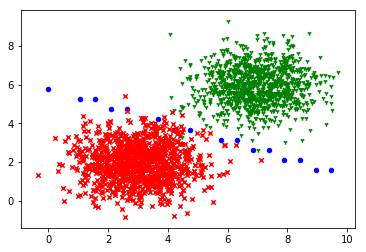

In [6]:
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)

plt.show()